## 4. Algoritmos en solitario

Una vez que hayamos definido el problema y preparado los datos, debemos aplicar algoritmos de aprendizaje automático a los datos para intentar ofrecer una solución eficiente. Al tratarse de un problema de clasificación, orientaremos la elección de los algoritmos utilizados hacia esa rama del Machine Learning. 

Dado que teníamos un dataset bastante desbalanceado y tuvimos que aplicar dos metodos de creación de observaciones sintéticas que proceden de la familia de los árboles de decisión, vamos a seguir por esa vía y, para probar el rendimiento que ofrecen, usaremos los siguientes algoritmos cercanos a los árboles, además de un Logistic Regression: 

-	Random Forest Classifier with Imblearn NearMiss
-	Random Forest Classifier with Imblearn SMOTE
-	Logistic Regression Classifier with Imblearn NearMiss
-	Logistic Regression Classifier with Imblearn SMOTE
-	Decision Tree Classifier with Imblearn NearMiss
-	Decision Tree Classifier with Imblearn SMOTE

Para La búsqueda exahustiva de hiper-parámetros usaremos Grid Search

Para evitar el overfitting usaremos Cross-validation que nos indicarán cómo de preciso se comportará el algoritmo para datos nuevos no observados.

En función del rendimiento que ofrezcan los algoritmos entrenados con datos creados con los dos métodos: Smote y Nearmiss, decidiremos que método usar para el resto del estudio. (Scikit-Learn, 2020)



In [28]:
# Importamos las librerías necesarias

import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Representaciones graficas locales

%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

# Obviamos los errores de actualización 

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)

# Ponemos la semilla
np.random.seed(0)

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [29]:
# Importamos la función de limpieza y preprocesado de datos
import frauddef

In [30]:
# Importamos el dataset 
df = pd.read_csv('Explor_uscecchini28.csv')

In [31]:
# Establecemos las variables de entrenamiento y test los dos métodos: Smote y Nearmiss llamndo a la función frauddef
X_train_nm, X_test_nm, y_train_nm, y_test_nm, X_train_sm, X_test_sm, y_train_sm, y_test_sm = frauddef.limpieza(df)

In [32]:
# Escalamos las variables con MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_nm = scaler.fit_transform(X_train_nm)
X_test_nm  = scaler.transform(X_test_nm)

---------------------------------------
### Logistic Regression Classifier
--------------------------------------

La regresión logística es uno de los métodos más utilizados para la clasificación de objetos. Básicamente es una regresión lineal con una función de activación al final que nos sirve para predecir una clase u otra. Dado nuestro caso, usaremos la Regresión Logística Binaria que es la Regresión Logística clásica, en la que hay dos clases a predecir.

<img src="https://miro.medium.com/max/1142/0*xP3AKNMEOsT-2DBC.png"> 

Fuente 1: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Fuente 2: https://medium.com/@rubialesalberto/regresi%C3%B3n-log%C3%ADstica-con-sklearn-4384c707075d

#### Logistic Regression with  Imblearn NearMiss


In [33]:
# Selección de los parámetros de Gradient Boosting con la función "GridSearchCV"
lr = LogisticRegression()
param =  dict(penalty = ["l1","l2"], C= np.logspace(-3,3,7))# l1 lasso l2 ridge

# establecemos la validación cruzado con 2 divisiones, los parámetros y el uso de núcleos de memoria.
lr_grid = GridSearchCV(lr, param, cv = 2, return_train_score= True, n_jobs = -1)

# Entrenamos grid model
lr_grid.fit(X_train_nm, y_train_nm)

GridSearchCV(cv=2, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             return_train_score=True)

In [34]:
# Selección de los mejores parámetros
print("Best Parameters for Logistic Regression with Imblearn NearMissh : ", lr_grid.best_params_)

Best Parameters for Logistic Regression with Imblearn NearMissh :  {'C': 1000.0, 'penalty': 'l2'}


In [35]:
# Construcción del modelo incluyendo los best params 
lr = LogisticRegression(penalty=lr_grid.best_params_['penalty'],
                              C=lr_grid.best_params_['C'])
lr.fit(X_train_nm, y_train_nm)

LogisticRegression(C=1000.0)

Logistic Regression with Imblearn NearMiss Training Score:  0.9380530973451328
Logistic Regression with Imblearn NearMiss Testing Score:  0.8979591836734694
- Nombre del Modelo: LogisticRegression 
 
 - Precisión: 0.8979591836734694 | 
 - Exactitud: 0.9565217391304348 | 
 - Exhaustividad: 0.8461538461538461 | 
 - F1: 0.8979591836734695 | 
 - AUC: 0.9013377926421405 |
 
 - Matriz de confusion: 
 [[22  1]
 [ 4 22]] 



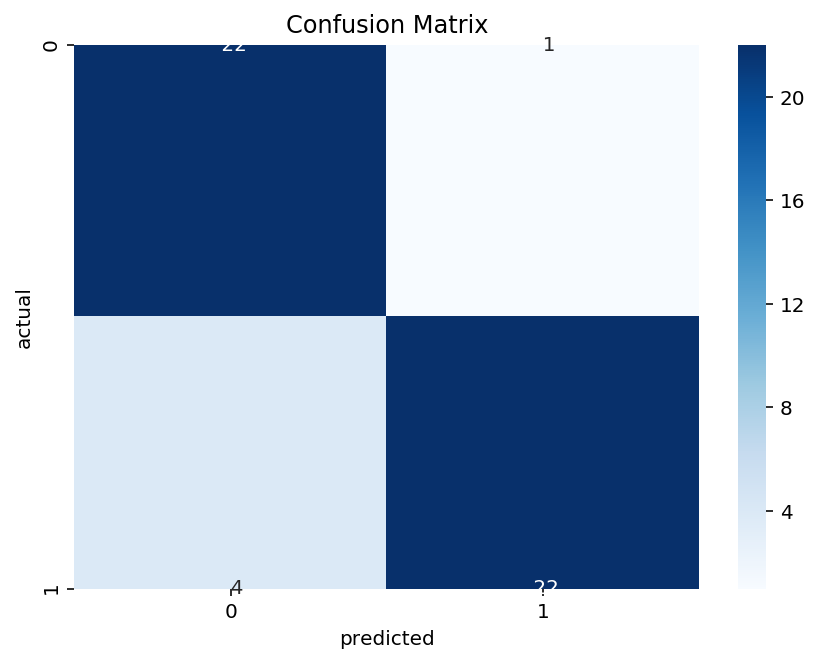

Text(0.5, 1.0, 'AUC = 0.90')

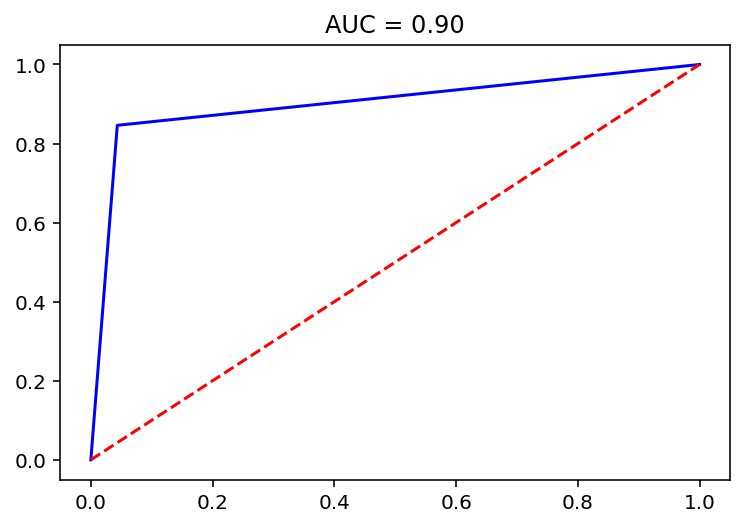

In [36]:
# Medición del rendimiento de los modelos; exactitud, exhaustividad, F1, Auc y matriz de confusión.
print("Logistic Regression with Imblearn NearMiss Training Score: ", lr.score(X_train_nm, y_train_nm))
print("Logistic Regression with Imblearn NearMiss Testing Score: ", lr.score(X_test_nm, y_test_nm))

y_test_pred = lr.predict(X_test_nm)
y_train_pred = lr.predict(X_train_nm)
cm = confusion_matrix(y_test_nm, y_test_pred)
false_positive_rate, recall, thresholds = roc_curve(y_test_nm, y_test_pred) # el area bajo la curva
roc_auc = auc(false_positive_rate, recall)
    
print("- Nombre del Modelo: {} \n" .format(lr.__class__.__name__) , "\n - Precisión: {} |" 
        .format(accuracy_score(y_test_nm, y_test_pred)), 
        "\n - Exactitud: {} |" .format(precision_score(y_test_nm, y_test_pred)), 
        "\n - Exhaustividad: {} |" .format(recall_score(y_test_nm, y_test_pred)), 
        "\n - F1: {} |" .format(f1_score(y_test_nm, y_test_pred)), 
        "\n - AUC: {} |\n" .format(auc(false_positive_rate, recall)),
        "\n - Matriz de confusion: \n {} \n" .format(cm))

plt.figure(figsize=(7,5))
sns.heatmap(cm,  cmap= 'Blues', annot=True, fmt='3')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

plot(false_positive_rate, recall, 'b') # imprimir el ratio
plot([0, 1], [0, 1], 'r--') # difinir el ratio entre 0 y 1
title('AUC = %0.2f' % roc_auc)

In [37]:
# Guardamos la Medición del rendimiento de los modelos en una tabla.
report_table_1 = ['Logistic Regression Classifier with Imblearn NearMiss', lr_grid.best_params_,
                  lr.score(X_train_nm, y_train_nm), lr.score(X_test_nm, y_test_nm), recall_score(y_test_nm, y_test_pred),
                 f1_score(y_test_nm, y_test_pred), auc(false_positive_rate, recall)]

---------------------------------------
### Decision Tree Classifier
--------------------------------------

Los arboles de decisión son representaciones gráficas de posibles soluciones a una decisión basadas en ciertas condiciones, es uno de los algoritmos de aprendizaje supervisado más utilizados en machine learning y pueden realizar tareas de clasificación o regresión. La comprensión de su funcionamiento suele ser simple y a la vez muy potente. Se bifurca cada nodo en 2 y vuelven a subdividirse hasta llegar a las hojas que son los nodos finales y que equivalen a respuestas a la solución: Si/No, Comprar/Vender, o lo que sea que estemos clasificando.

Para obtener el árbol óptimo y valorar cada subdivisión entre todos los árboles posibles y conseguir el nodo raiz y los subsiguientes, el algoritmo deberá medir de alguna manera las predicciones logradas y valorarlas para comparar de entre todas y obtener la mejor. Para medir y valorar, utiliza diversas funciones, siendo las más conocidas y usadas los «Indice gini» y «Ganancia de información» que utiliza la denominada «entropía«. La división de nodos continuará hasta que lleguemos a la profundidad máxima posible del árbol ó se limiten los nodos a una cantidad mínima de muestras en cada hoja.

En el proceso de creación de los árboles de decisión se suelen utilizar algunas de las siguientes tres medidas de impureza:

Entropía (“entropy”)
𝐼𝐸(𝑥)=−∑𝑖=1𝑐𝑝(𝑖|𝑥)log2(𝑝(𝑖|𝑥))
 
El índice Gini (“Gini index”)
𝐼𝐺(𝑥)=∑𝑖=1𝑐𝑝(𝑖|𝑥)(−𝑝(𝑖|𝑥))=1−∑𝑖=1𝑐𝑝(𝑖|𝑥)2
 
Error de clasificación (“classification error”)
𝐼𝐶𝐸(𝑥)=1−max{𝑝(𝑖|𝑥)}
 
En estas ecuaciones  𝑝(𝑖|𝑥)  es la probabilida de la clase  𝑖 .


Fuente: https://www.aprendemachinelearning.com/arbol-de-decision-en-python-clasificacion-y-prediccion/

#### Decision Tree Classifier Imblearn NearMiss


In [38]:
# Selección de los parámetros de Decision Tree con la función "GridSearchCV"
dt = DecisionTreeClassifier()
grid_param = dict(criterion=['gini','entropy'],max_depth= np.arange(1, 15))

# establecemos la validación cruzado con 2 divisiones, los parámetros y el uso de núcleos de memoria.
dt_grid = GridSearchCV(dt, grid_param, cv = 2, n_jobs = -1)

# Entrenamos grid model
dt_grid.fit(X_train_nm, y_train_nm)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [39]:
# Selección de los mejores parámetros
print("Best Parameters for Decision Tree Classifier: ", dt_grid.best_params_)

Best Parameters for Decision Tree Classifier:  {'criterion': 'gini', 'max_depth': 4}


In [40]:
# Construcción del modelo incluyendo los best params
dt = DecisionTreeClassifier(max_depth= dt_grid.best_params_['max_depth']
                                ,criterion= dt_grid.best_params_['criterion'])
dt.fit(X_train_sm, y_train_sm)

DecisionTreeClassifier(max_depth=4)

Decision Tree Classifier Training Score:  0.48672566371681414
Decision Tree Classifier Testing Score:  0.5306122448979592
- Nombre del Modelo: DecisionTreeClassifier 
 
 - Precisión: 0.5306122448979592 | 
 - Exactitud: 0.5306122448979592 | 
 - Exhaustividad: 1.0 | 
 - F1: 0.6933333333333334 | 
 - AUC: 0.5 |
 
 - Matriz de confusion: 
 [[ 0 23]
 [ 0 26]] 



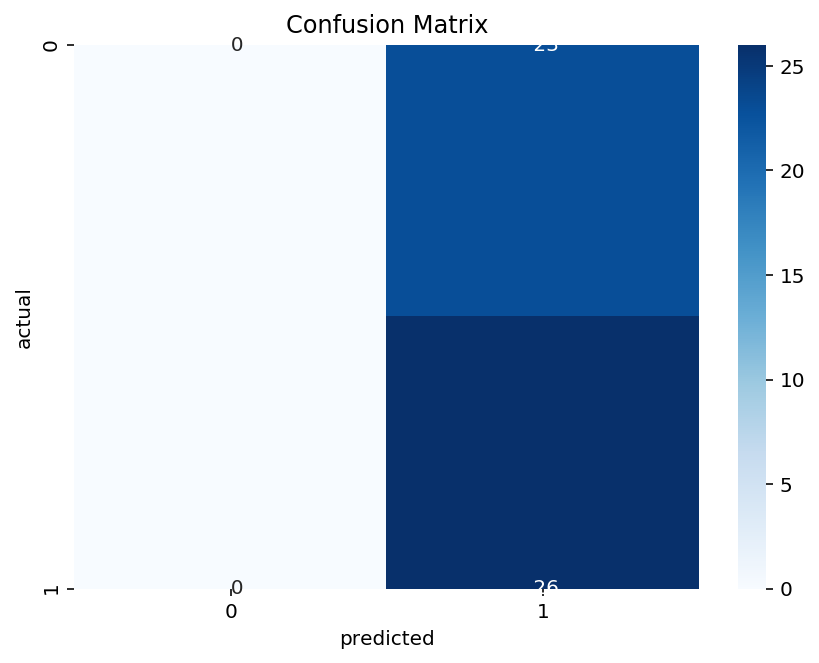

Text(0.5, 1.0, 'AUC = 0.50')

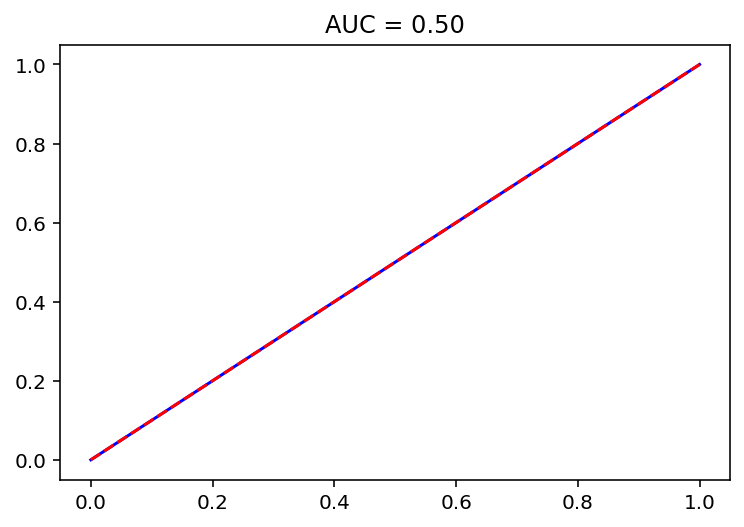

In [41]:
# Medición del rendimiento de los modelos; exactitud, exhaustividad, F1, Auc y matriz de confusión.
print("Decision Tree Classifier Training Score: ", dt.score(X_train_nm, y_train_nm))
print("Decision Tree Classifier Testing Score: ", dt.score(X_test_nm, y_test_nm))

y_test_pred = dt.predict(X_test_nm)
y_train_pred = dt.predict(X_train_nm)
cm = confusion_matrix(y_test_nm, y_test_pred)
false_positive_rate, recall, thresholds = roc_curve(y_test_nm, y_test_pred) # el area bajo la curva
roc_auc = auc(false_positive_rate, recall)
    
print("- Nombre del Modelo: {} \n" .format(dt.__class__.__name__) , "\n - Precisión: {} |" 
        .format(accuracy_score(y_test_nm, y_test_pred)), 
        "\n - Exactitud: {} |" .format(precision_score(y_test_nm, y_test_pred)), 
        "\n - Exhaustividad: {} |" .format(recall_score(y_test_nm, y_test_pred)), 
        "\n - F1: {} |" .format(f1_score(y_test_nm, y_test_pred)), 
        "\n - AUC: {} |\n" .format(auc(false_positive_rate, recall)),
        "\n - Matriz de confusion: \n {} \n" .format(cm))

plt.figure(figsize=(7,5))
sns.heatmap(cm,  cmap= 'Blues', annot=True, fmt='3')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

plot(false_positive_rate, recall, 'b') # imprimir el ratio
plot([0, 1], [0, 1], 'r--') # difinir el ratio entre 0 y 1
title('AUC = %0.2f' % roc_auc)

In [42]:
# Guardamos la Medición del rendimiento de los modelos en una tabla.
report_table_2 = ['Decision Tree Classifier with Imblearn NearMiss', dt_grid.best_params_,
                  dt.score(X_train_nm, y_train_nm), dt.score(X_test_nm, y_test_nm), recall_score(y_test_nm, y_test_pred),
                 f1_score(y_test_nm, y_test_pred), auc(false_positive_rate, recall)]

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.46046
Feature: 6, Score: 0.53954
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00000


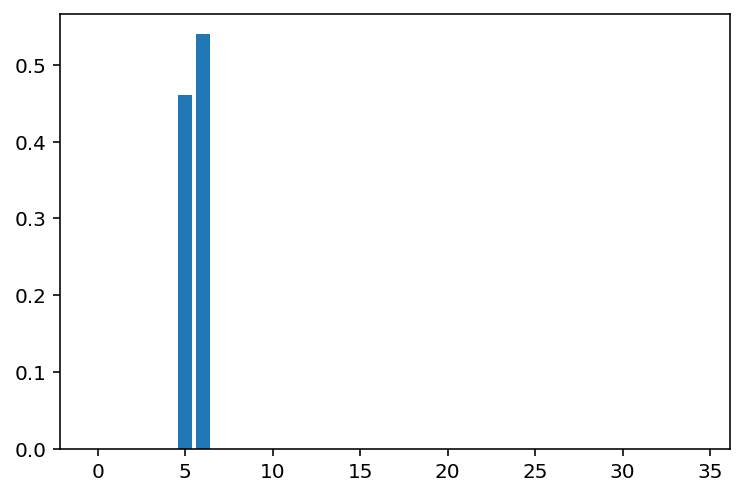

In [43]:
# Las variables que más aportan a nuestro modelo con la función feature_importances_
importance = dt.feature_importances_

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

# Representamos en un gráfico
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

----------------------------------------------------

### Random Forest Classifier

----------------------------------------------------

Los bosques aleatorios es un algoritmo de aprendizaje supervisado. Se puede usar tanto para clasificación como para regresión. También es el algoritmo más flexible y fácil de usar. Un bosque está compuesto de árboles. Se dice que cuantos más árboles tenga, más robusto es un bosque. Los bosques aleatorios crean árboles de decisión en muestras de datos seleccionadas al azar, obtienen predicciones de cada árbol y seleccionan la mejor solución mediante la votación. También proporciona un indicador bastante bueno de la importancia de la función.

Los bosques aleatorios tienen una variedad de aplicaciones, como motores de recomendación, clasificación de imágenes y selección de características. Se puede utilizar para clasificar a los solicitantes de préstamos leales, identificar actividades fraudulentas y predecir enfermedades.

Funciona en cuatro pasos:

- Seleccione muestras aleatorias de un conjunto de datos dado.
- Construya un árbol de decisión para cada muestra y obtenga un resultado de predicción de cada árbol de decisión.
- Realice una votación para cada resultado previsto.
- Seleccione el resultado de la predicción con más votos como la predicción final.


<img src="http://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1526467744/voting_dnjweq.jpg">

Fuente: https://www.datacamp.com/community/tutorials/random-forests-classifier-python

#### Random Forest with Imblearn NearMiss


In [44]:
# Declaramos el algoritmo
rf = RandomForestClassifier()
# Selección de los parámetros de RF con la función "GridSearchCV"
grid_param = dict(max_depth=[1,3,5,7,9,15], 
                  n_estimators= [100,250,500],criterion=['gini', 'entropy'])

# establecemos la validación cruzado con 2 divisiones, los parámetros y el uso de núcleos de memoria. 
rf_grid = GridSearchCV(rf, grid_param, cv = 2, n_jobs = -1, return_train_score= True)

# Entrenamos grid model
rf_grid.fit(X_train_nm, y_train_nm)

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 5, 7, 9, 15],
                         'n_estimators': [100, 250, 500]},
             return_train_score=True)

In [45]:
# Selección de los mejores parámetros
print("Best Parameters for Random Forest with Imblearn NearMiss: ", rf_grid.best_params_)

Best Parameters for Random Forest with Imblearn NearMiss:  {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 100}


In [46]:
# Construcción del modelo incluyendo los best params
RF1 = RandomForestClassifier(n_estimators= rf_grid.best_params_['n_estimators']
                                , max_depth= rf_grid.best_params_['max_depth']
                                ,criterion = rf_grid.best_params_['criterion'])

# Entrenamos el modelo
RF1.fit(X_train_nm, y_train_nm)

RandomForestClassifier(max_depth=9)

Random Forest Classifier Training Score:  1.0
Random Forest Classifier Testing Score:  1.0
- Nombre del Modelo: RandomForestClassifier 
 
 - Precisión: 1.0 | 
 - Exactitud: 1.0 | 
 - Exhaustividad: 1.0 | 
 - F1: 1.0 | 
 - AUC: 1.0 |
 
 - Matriz de confusion: 
 [[23  0]
 [ 0 26]] 



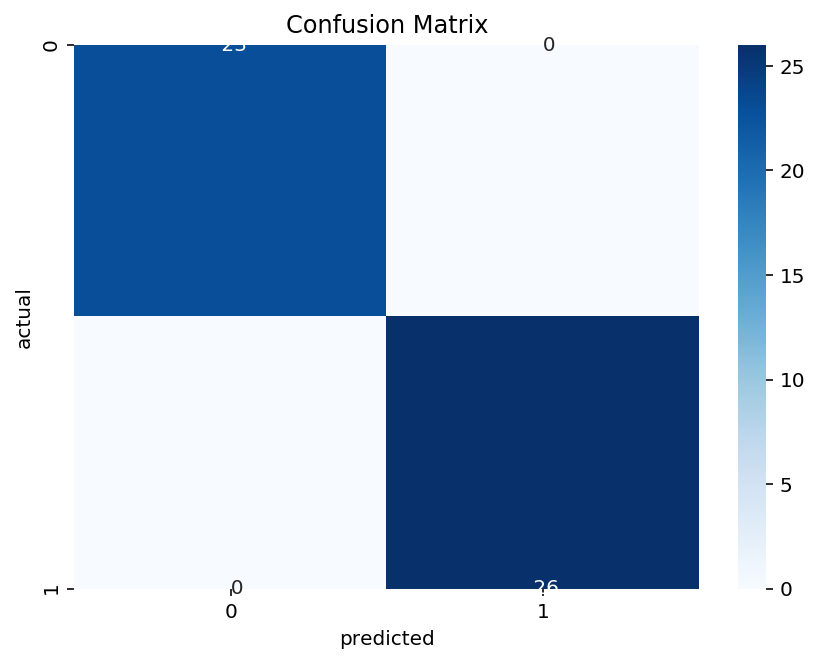

Text(0.5, 1.0, 'AUC = 1.00')

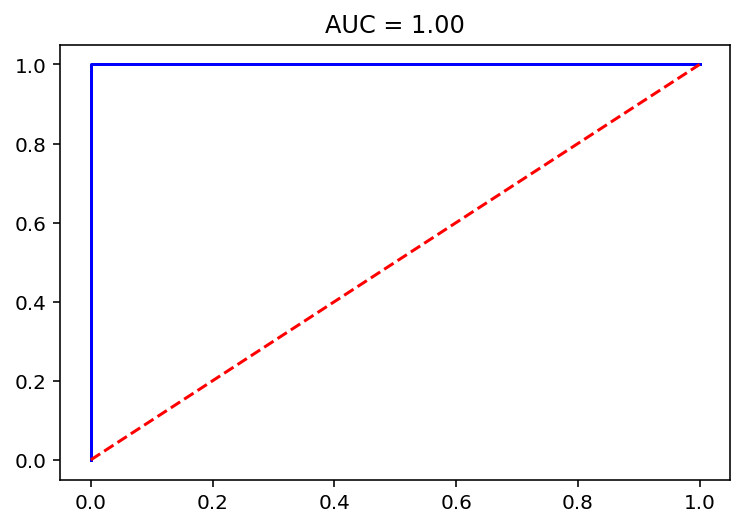

In [47]:
# Medición del rendimiento de los modelos; exactitud, exhaustividad, F1, Auc y matriz de confusión.
print("Random Forest Classifier Training Score: ", RF1.score(X_train_nm, y_train_nm))
print("Random Forest Classifier Testing Score: ", RF1.score(X_test_nm, y_test_nm))

y_test_pred = RF1.predict(X_test_nm)
y_train_pred = RF1.predict(X_train_nm)
cm = confusion_matrix(y_test_nm, y_test_pred)
false_positive_rate, recall, thresholds = roc_curve(y_test_nm, y_test_pred) # el area bajo la curva
roc_auc = auc(false_positive_rate, recall)
    
print("- Nombre del Modelo: {} \n" .format(RF1.__class__.__name__) , "\n - Precisión: {} |" 
        .format(accuracy_score(y_test_nm, y_test_pred)), 
        "\n - Exactitud: {} |" .format(precision_score(y_test_nm, y_test_pred)), 
        "\n - Exhaustividad: {} |" .format(recall_score(y_test_nm, y_test_pred)), 
        "\n - F1: {} |" .format(f1_score(y_test_nm, y_test_pred)), 
        "\n - AUC: {} |\n" .format(auc(false_positive_rate, recall)),
        "\n - Matriz de confusion: \n {} \n" .format(cm))
    
plt.figure(figsize=(7,5))
sns.heatmap(cm,  cmap= 'Blues', annot=True, fmt='3')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

plot(false_positive_rate, recall, 'b') # imprimir el ratio
plot([0, 1], [0, 1], 'r--') # difinir el ratio entre 0 y 1
title('AUC = %0.2f' % roc_auc)

In [48]:
# Guardamos la Medición del rendimiento de los modelos en una tabla.
report_table_3 = ['Random Forest Classifier with Imblearn NearMiss',rf_grid.best_params_,
                  RF1.score(X_train_nm, y_train_nm), RF1.score(X_test_nm, y_test_nm), recall_score(y_test_nm, y_test_pred),
                 f1_score(y_test_nm, y_test_pred), auc(false_positive_rate, recall)]

Feature: 0, Score: 0.09038
Feature: 1, Score: 0.03968
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.01018
Feature: 5, Score: 0.07785
Feature: 6, Score: 0.12747
Feature: 7, Score: 0.05704
Feature: 8, Score: 0.03275
Feature: 9, Score: 0.09290
Feature: 10, Score: 0.03394
Feature: 11, Score: 0.00933
Feature: 12, Score: 0.03662
Feature: 13, Score: 0.01054
Feature: 14, Score: 0.00634
Feature: 15, Score: 0.00600
Feature: 16, Score: 0.01404
Feature: 17, Score: 0.02513
Feature: 18, Score: 0.00348
Feature: 19, Score: 0.00394
Feature: 20, Score: 0.00767
Feature: 21, Score: 0.00393
Feature: 22, Score: 0.02571
Feature: 23, Score: 0.07104
Feature: 24, Score: 0.00619
Feature: 25, Score: 0.01402
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00298
Feature: 28, Score: 0.02329
Feature: 29, Score: 0.08180
Feature: 30, Score: 0.01663
Feature: 31, Score: 0.00999
Feature: 32, Score: 0.00572
Feature: 33, Score: 0.04206
Feature: 34, Score: 0.01136


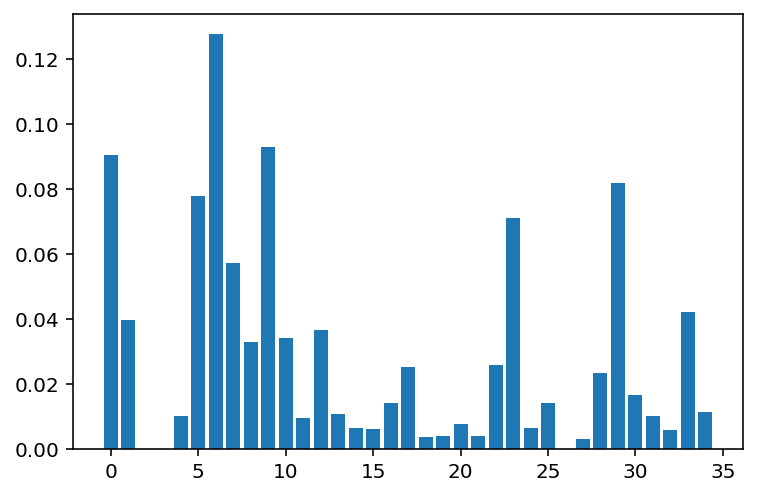

In [49]:
# Las variables que más aportan a nuestro modelo con la función feature_importances_

importance = RF1.feature_importances_

for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

# Representamos en un gráfico
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

##### Para comparar todos los modelos, creemos una tabla y un diagrama.

In [50]:
# Construcción de la tabla con los distintos medidores de rendimiento para usarlos en una tabla comparativa. 
report_table = pd.DataFrame(list(zip(report_table_1,
             report_table_2,
             report_table_3))).transpose()


In [51]:
# Mostrar la Medición del rendimiento de los modelos en una tabla.
report_table.columns = ['Model Name', 'Model Parameter', 'Training Score', 'Testing Score', "Exhaustividad", "F1", "AUC"]
report_table.index = report_table['Model Name']
report_table.head(6)

,Model Name,Model Parameter,Training Score,Testing Score,Exhaustividad,F1,AUC
Model Name,,,,,,,
Logistic Regression Classifier with Imblearn NearMiss,Logistic Regression Classifier with Imblearn N...,"{'C': 1000.0, 'penalty': 'l2'}",0.938053,0.897959,0.846154,0.897959,0.901338
Decision Tree Classifier with Imblearn NearMiss,Decision Tree Classifier with Imblearn NearMiss,"{'criterion': 'gini', 'max_depth': 4}",0.486726,0.530612,1,0.693333,0.5
Random Forest Classifier with Imblearn NearMiss,Random Forest Classifier with Imblearn NearMiss,"{'criterion': 'gini', 'max_depth': 9, 'n_estim...",1,1,1,1,1


In [52]:
# guardamos los resultados
report_table.to_csv('Nearmiss.csv')

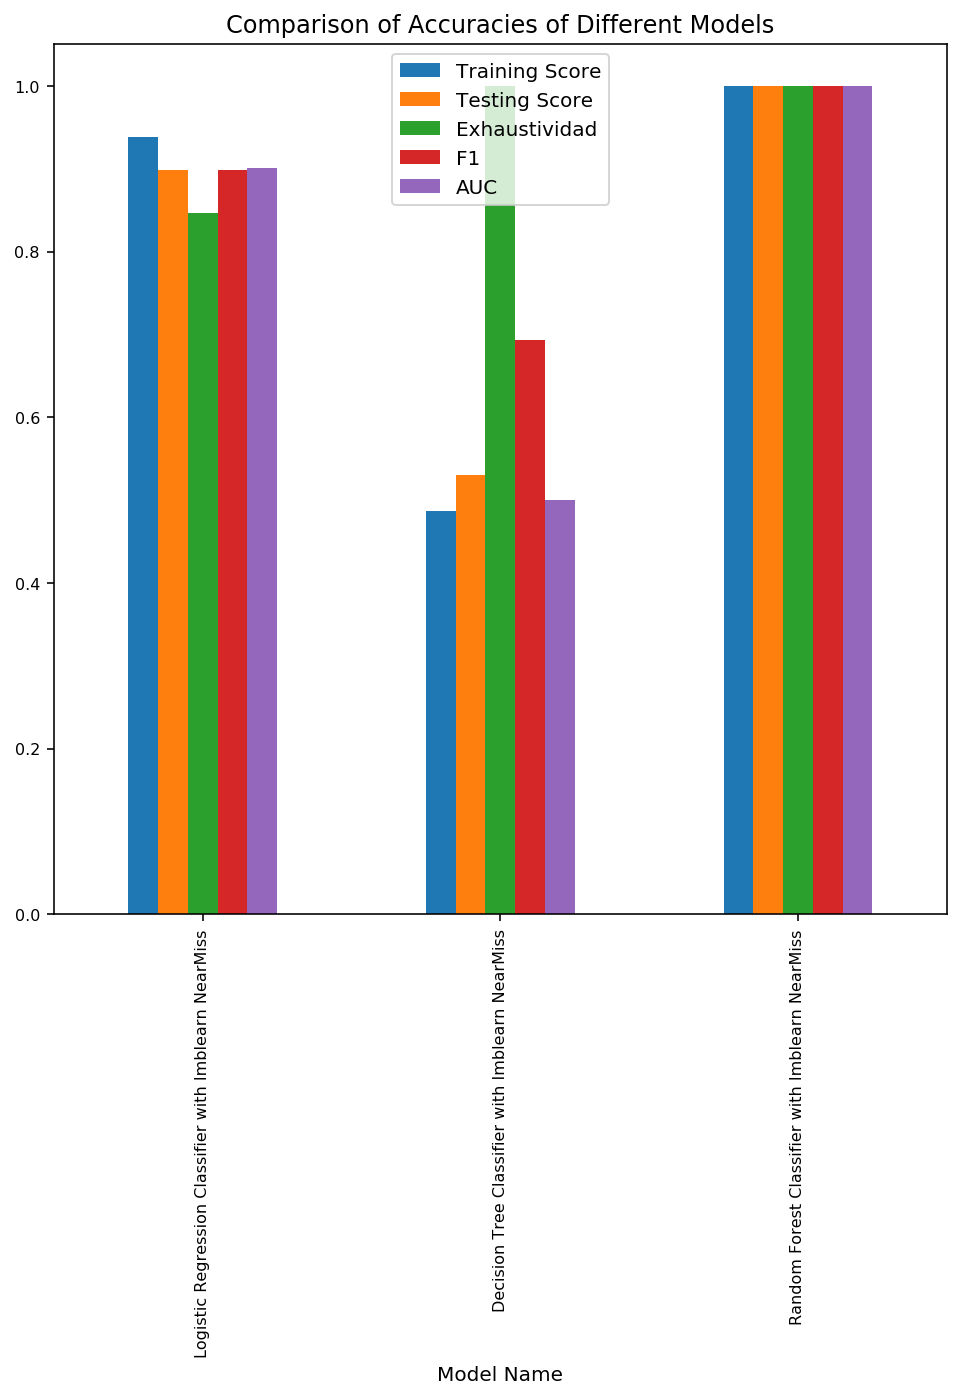

In [53]:
# Representamos el rendimiento de los modelos:

ax = report_table[['Model Name', 'Model Parameter', 'Training Score', 'Testing Score', "Exhaustividad", "F1", "AUC"]].plot(kind='bar',
            title = "Comparison of Accuracies of Different Models", figsize=(8, 8), fontsize = 8)
plt.show()

In [54]:
# guardamos los resultados
report_table.to_csv('Individual_With_NearMiss.csv')